In [76]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error


In [62]:
df=pd.read_csv('INVCMRMT.csv',sep=',',comment='#',index_col=False)
df.index = pd.to_datetime(df['DATE'])
df

,DATE,INVCMRMT
DATE,,
1997-01-01,1997-01-01,1301161.0
1997-02-01,1997-02-01,1307080.0
1997-03-01,1997-03-01,1303978.0
1997-04-01,1997-04-01,1319740.0
1997-05-01,1997-05-01,1327294.0
...,...,...
2018-08-01,2018-08-01,2156969.0
2018-09-01,2018-09-01,2163820.0
2018-10-01,2018-10-01,2172890.0


<AxesSubplot:xlabel='DATE'>

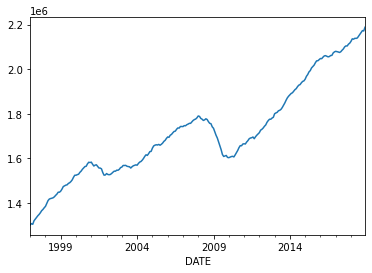

In [63]:

INVCRMT=df['INVCMRMT']
INVCRMT.plot()

In [64]:
INVCRMT.index.freq='MS'

In [65]:
auto_arima(INVCRMT, trace=True).summary

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5373.461, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5344.931, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5405.646, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5347.152, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5410.749, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5379.872, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.443 seconds


<function pmdarima.arima.arima.ARIMA.summary(self)>

In [66]:
train=INVCRMT.iloc[:-12]
test=INVCRMT.iloc[-12:]
test

DATE
2018-01-01    2124655.0
2018-02-01    2135865.0
2018-03-01    2134146.0
2018-04-01    2138236.0
2018-05-01    2137865.0
2018-06-01    2139842.0
2018-07-01    2148096.0
2018-08-01    2156969.0
2018-09-01    2163820.0
2018-10-01    2172890.0
2018-11-01    2171104.0
2018-12-01    2187849.0
Freq: MS, Name: INVCMRMT, dtype: float64

In [67]:
model=ARIMA(train, order=(0,1,0))
results=model.fit()

In [68]:
start=len(train)
end=start+len(test)-1
predictions=results.predict(start=start, end=end).rename('ARIMA(0,1,0)(0,0,0,0)')

<AxesSubplot:xlabel='DATE'>

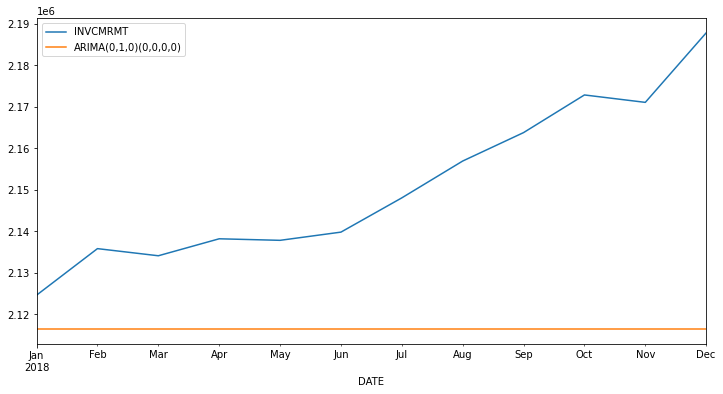

In [69]:
ax=test.plot(legend=True, figsize=(12,6))
predictions.plot(legend=True)

In [73]:
INVCRMTDiff=INVCRMT.diff()

<AxesSubplot:xlabel='DATE'>

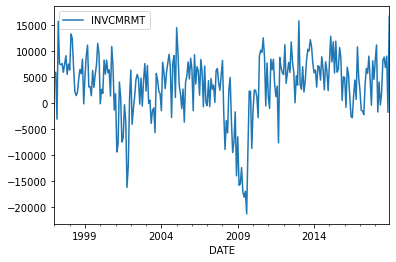

In [79]:
INVCRMTDiff.plot(legend=True)

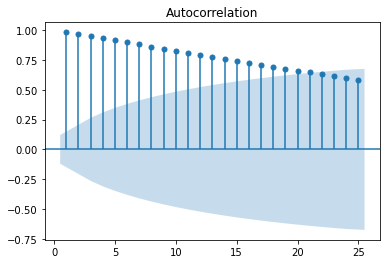

In [84]:
plot_acf(INVCRMT, zero=False);

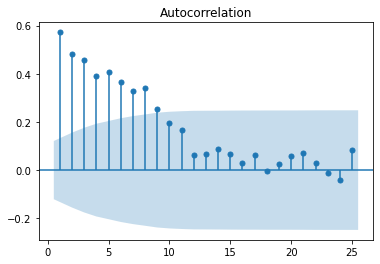

In [86]:
plot_acf(INVCRMT.diff().iloc[1:], zero=False);

Looking at Autocorrelation chart for differenced data we can see that it is truly stationary (the values degrade to zero quickly).